In [10]:
# from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import exp, inf, tanh
from numpy import mean, std
from scipy.stats import norm

In [6]:
class ChangePointSequence:
    def __init__(self, N, mean, standard_deviation, change_point_position):
        self.N = N
        self.counter = -1
        self.mean = mean
        self.standard_deviation = standard_deviation
        self.change_point_position = change_point_position
        self.sequence = []
        
    def __iter__(self):
        return self
    
    def __next__(self):
        pass

    
class NoChangePoint(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности без разладки.
    '''
    def __init__(self, N, mean, standard_deviation):
        super().__init__(N, mean, standard_deviation, 0)
        
    def __next__(self):
        if self.counter < self.N:
            self.counter += 1
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1))             
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        else:
            raise StopIteration
    

class ChagePointMean(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в М.О.
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, mean_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.mean_change = mean_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=(self.mean+self.mean_change), scale=self.standard_deviation, size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        
        else:
            raise StopIteration
            
            
class ChagePointMeanDynamic(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в М.О.
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, mean_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.mean_change = mean_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=(self.mean+self.mean_change*(self.counter-self.change_point_position)),
                                scale=self.standard_deviation,
                                size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
            
        else:
            raise StopIteration
            
            
class ChagePointDispersion(ChangePointSequence):
    '''
    Потоковая генерация случайной последовательности с разладкой в дисперсии
    '''
    def __init__(self, N, mean, standard_deviation, change_point_position, standard_deviation_change):
        super().__init__(N, mean, standard_deviation, change_point_position)
        self.standard_deviation_change = standard_deviation_change
        
    def __next__(self):
        if self.counter < self.N:
            
            self.counter += 1
            
            new_element_sequence = float(norm.rvs(loc=self.mean, scale=self.standard_deviation, size=1)) \
            if self.counter <= self.change_point_position \
            else float(norm.rvs(loc=self.mean, scale=(self.standard_deviation+self.standard_deviation_change), size=1))
            
            self.sequence.append(new_element_sequence)
            return new_element_sequence
        
        else:
            raise StopIteration    

In [96]:
sequence = ChagePointMean(N=1000, mean=0, standard_deviation=1/2, change_point_position=600, mean_change=2)

g = 9
R = [0]
k = 100

# Заполняем изначальными значениями
while len(sequence.sequence) < k:
    new_value = next(sequence)
    
from numpy import mean, std
m = mean(sequence.sequence)
s = np.std(sequence.sequence)
v = (abs(m) + 2*s) 

for new_value in sequence:
    Rt = exp(new_value - v) * (1 + R[-1])
    if Rt > g:
        print('changepoint', sequence.counter - 1, 'Rt =', Rt)
        #break
    R.append(Rt)    

for new_value in sequence:
    pass

sequence.counter

changepoint 600 Rt = 9.849875382422036
changepoint 601 Rt = 14.476581081491059
changepoint 602 Rt = 32.87584599711214
changepoint 603 Rt = 57.946808819241426
changepoint 604 Rt = 80.59578558603644
changepoint 605 Rt = 182.11404877104164
changepoint 606 Rt = 521.7875476907087
changepoint 607 Rt = 3741.8638267162182
changepoint 608 Rt = 8198.12096631362
changepoint 609 Rt = 20430.94836383729
changepoint 610 Rt = 22684.921154426615
changepoint 611 Rt = 72172.55606781931
changepoint 612 Rt = 239548.92887446054
changepoint 613 Rt = 413938.81271464523
changepoint 614 Rt = 1516986.6897801897
changepoint 615 Rt = 7738645.7370214695
changepoint 616 Rt = 12243311.547688466
changepoint 617 Rt = 79652395.21902302
changepoint 618 Rt = 165354808.23600554
changepoint 619 Rt = 1617007766.857776
changepoint 620 Rt = 2021989263.8300407
changepoint 621 Rt = 11526464256.861113
changepoint 622 Rt = 47670195260.55164
changepoint 623 Rt = 171688776187.07068
changepoint 624 Rt = 657708694785.5299
changepoint 

changepoint 895 Rt = 2.268890662947705e+127
changepoint 896 Rt = 8.345887955878233e+127
changepoint 897 Rt = 3.988000526268515e+128
changepoint 898 Rt = 7.349805652156177e+128
changepoint 899 Rt = 2.135030184972111e+129
changepoint 900 Rt = 3.783507202029734e+129
changepoint 901 Rt = 3.608610267876556e+129
changepoint 902 Rt = 2.1660978384449642e+130
changepoint 903 Rt = 3.081653651352854e+130
changepoint 904 Rt = 4.2675145464514185e+130
changepoint 905 Rt = 1.7278163966114219e+131
changepoint 906 Rt = 1.631782452992686e+132
changepoint 907 Rt = 2.5542417428642737e+132
changepoint 908 Rt = 1.0176798980864803e+133
changepoint 909 Rt = 2.6523971657798366e+133
changepoint 910 Rt = 5.718191635286339e+133
changepoint 911 Rt = 1.5659447497530854e+134
changepoint 912 Rt = 3.292673299488165e+134
changepoint 913 Rt = 5.626120791304871e+134
changepoint 914 Rt = 3.506928929949777e+135
changepoint 915 Rt = 2.599448852884084e+136
changepoint 916 Rt = 1.4919596206188474e+137
changepoint 917 Rt = 6.5

1000

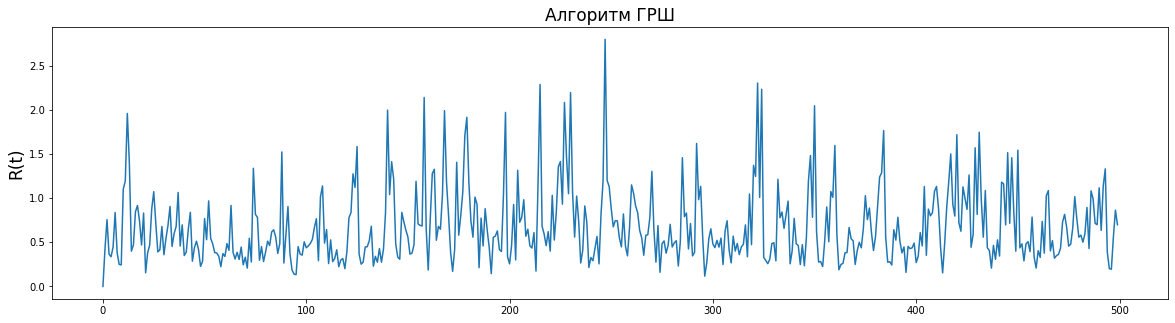

In [94]:
plt.figure(figsize=(20,5))
plt.ylabel('R(t)', fontsize=17)
plt.title('Алгоритм ГРШ', fontsize=17)
plt.plot(R[0:500])
plt.show()

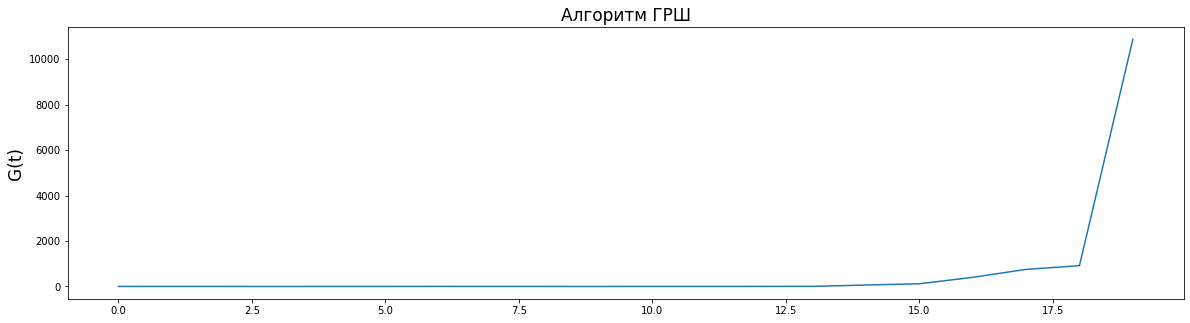

In [87]:
plt.figure(figsize=(20,5))
plt.ylabel('G(t)', fontsize=17)
plt.title('Алгоритм ГРШ', fontsize=17)
plt.plot(R[590:610])
plt.show()

In [51]:
def algorithm_grsh_test(seq, g, k):
    R = [0]
    
    # Заполняем изначальными значениями
    while len(sequence.sequence) < k:
        new_value = next(sequence)

    from numpy import mean, std
    m = mean(sequence.sequence)
    s = np.std(sequence.sequence)
    v = (abs(m) + 2*s) 
    
    for new_value in seq:
        Rt = exp(new_value - v) * (1 + R[-1])
        if Rt > g:
            print('changepoint', seq.counter - 1, 'Rt =', Rt)
            return seq.counter - 1
        R.append(Rt)
    print('No change points.')
    
    
for i in range(10):    
    
    sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=1, 
        change_point_position=600, 
        mean_change=3)
    
    algorithm_grsh(seq=sequence, g=9, k=100)

# Оценка плотностей

In [8]:
def algorithm_grsh(seq, g, k):
    R = [0]
    
    # Заполняем изначальными значениями
    while len(sequence.sequence) < k:
        new_value = next(sequence)

    from numpy import mean, std
    m = mean(sequence.sequence)
    s = np.std(sequence.sequence)
    v = (abs(m) + 2*s) 
    
    for new_value in seq:
        Rt = exp(new_value - v) * (1 + R[-1])
        if Rt > g:
            #print('changepoint', seq.counter - 1, 'Rt =', Rt)
            return seq.counter - 1
        R.append(Rt)
    #print('No change points.')
    return -1


# Алгоритм Воробейчикова
def algorithm_change_point_St(seq, difference_step_count, t0=300, m=1, N=8, n0=400):

    def z_n(N, m, x, t, t0):
        def sign(x):
            return 1 if x >= 0 else -1

        def y_n(x, t, t0):
            return sign(x[t] - x[t-t0])

        return N * y_n(x, t, t0) - m
    
    def dcp(difference_step_count, difference):
        if len(difference) < difference_step_count:
            return False
        previous = None
        for i in range(difference_step_count-1):
            if difference[-1-i] != difference[-2-i]:
                return False
        return True
    
    
    l = N + m
    Sn = []
    t = 0
    x = []
    difference = []
    
    while t <= n0:
        x.append(next(sequence))
        Sn.append(l)
        t += 1

    for new_value in sequence:
        x.append(new_value)
        zn = z_n(N, m, x, t, t0)
        current_Sn = max(Sn[-1] + zn, l)
        difference.append((current_Sn - Sn[-1]))
        if dcp(difference_step_count, difference):
            return (t, t - difference_step_count)

        Sn.append(current_Sn)
        t += 1
        
    return (-1, -1)

# Тест для оценки W

In [11]:
%%time

def calculate_W(k, change_point_list, N=1000, CP=600):
    left = CP
    right = CP + k 
    lst_freq = [x for x in change_point_list if left <= x <= right]
    return len(lst_freq) / N

# Показатели W1, W2, W3, W4
lst_W1 = []
lst_W2 = []
lst_W3 = []
lst_W4 = []

# Показатели K1, K2, K3, K4
k1 = 5
k2 = 10
k3 = 15
k4 = 20

# При различных значениях сигма
lst_sig = [a/100 for a in range(100, 301, 25)]

len_timeseries = 1000
cpp = 600
N = 1000


for sig in lst_sig:
    # Для алгоритма GRSh
    lst = []
    for i in range(N):    
        sequence = ChagePointDispersion(
            N=len_timeseries,
            mean=1, 
            standard_deviation=1,
            change_point_position=cpp,
            standard_deviation_change=sig
        )

        result = algorithm_grsh(seq=sequence, g=12, k=100)
        lst.append(result)
        
    W_1 = calculate_W(k1, lst)
    W_2 = calculate_W(k2, lst)
    W_3 = calculate_W(k3, lst)
    W_4 = calculate_W(k4, lst)
    
    lst_W1.append(W_1)
    lst_W2.append(W_2)
    lst_W3.append(W_3)
    lst_W4.append(W_4)

Wall time: 6min 40s


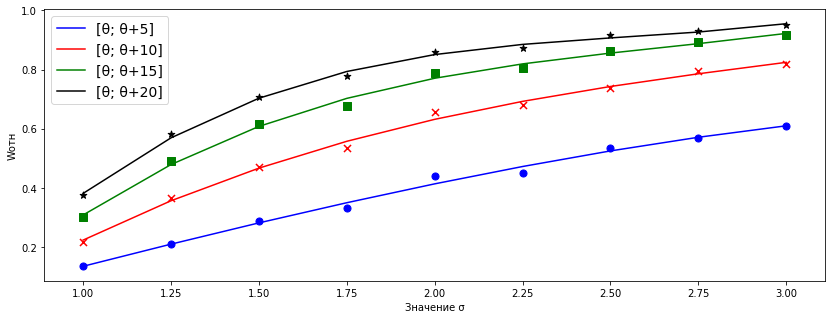

In [42]:
plt.figure(figsize=(14,5))
plt.ylabel('Wотн')
plt.xlabel('Значение σ')

sns.lineplot(x=lst_sig, 
             y=savgol_filter(lst_W1, len(lst_sig), 3),
             color='blue',
             label='[θ; θ+5]')
plt.scatter(lst_sig, lst_W1, color='blue', s=50, marker='o')

sns.lineplot(x=lst_sig, 
             y=savgol_filter(lst_W2, len(lst_sig), 3),
             color='red',
             label='[θ; θ+10]')
plt.scatter(lst_sig, lst_W2, color='red', s=50, marker='x')

sns.lineplot(x=lst_sig, 
             y=savgol_filter(lst_W3, len(lst_sig), 3),
             color='green',
             label='[θ; θ+15]')
plt.scatter(lst_sig, lst_W3, color='green', s=50, marker='s')

sns.lineplot(x=lst_sig, 
             y=savgol_filter(lst_W4, len(lst_sig), 3),
             color='black',
             label='[θ; θ+20]')
plt.scatter(lst_sig, lst_W4, color='black', s=50, marker='*')

plt.legend(fontsize=14) 
plt.show()

In [55]:
[a/20 for a in range(20, 65, 5)]

[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]

In [54]:
[a/100 for a in range(40, 241, 20)]

[0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]

In [4]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [23]:
lst = []
for i in range(1000):    
    sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=3, 
        change_point_position=600, 
        mean_change=2)

    result = algorithm_grsh(seq=sequence, g=12, k=100)
    lst.append(result)

lst_mean_1 = [x-600 for x in lst if x >= 600]

lst = []
for i in range(1000):    
    sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=1, 
        change_point_position=600, 
        mean_change=2)

    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    lst.append(result)

lst_mean_2 = [x-600 for x in lst if x >= 600]

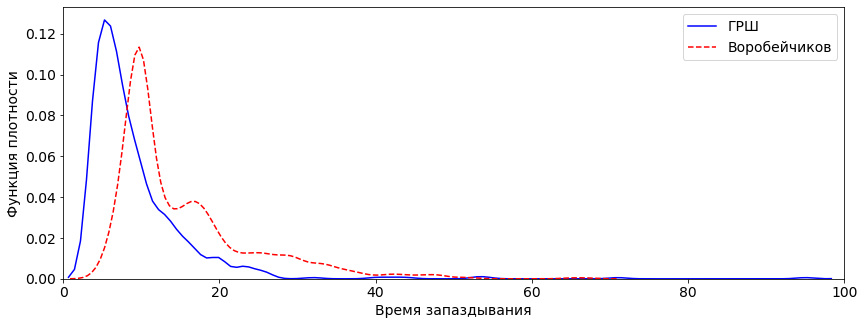

In [63]:
plt.figure(figsize=(14,5))
plt.ylabel('Функция плотности')
plt.xlabel('Время запаздывания')

plt.xlim(0, 100)

sns.kdeplot(lst_mean_1, 
            clip=(3, 200.0),
            kernel='gau',
            bw='silverman',
            color='blue',
            label='ГРШ');

sns.kdeplot(lst_mean_2, 
            clip=(4, 200.0),
            kernel='gau',
            bw='silverman',
            color='red',
            linestyle='--',
            label='Воробейчиков');

plt.legend(fontsize=14) 
plt.show()

In [68]:
lst = []
for i in range(1000):    
    sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=2, 
                change_point_position=600, 
                mean_change=0.5)

    result = algorithm_grsh(seq=sequence, g=12, k=100)
    lst.append(result)

lst_mean_1 = [x-600 for x in lst if x >= 600]

lst = []
for i in range(1000):    
    sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=2, 
                change_point_position=600, 
                mean_change=0.5)

    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    lst.append(result)

lst_mean_2 = [x-600 for x in lst if x >= 600]

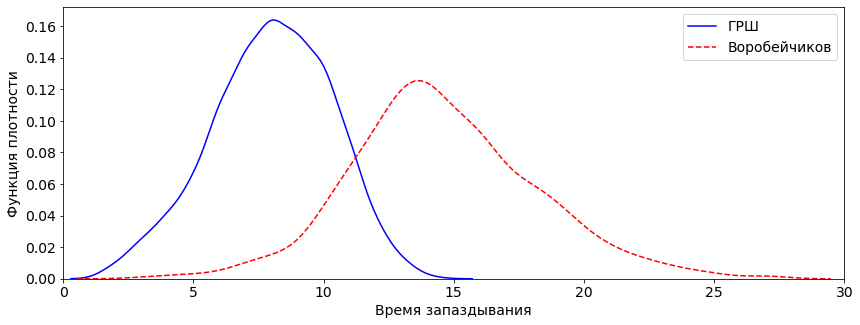

In [77]:
plt.figure(figsize=(14,5))
plt.ylabel('Функция плотности')
plt.xlabel('Время запаздывания')

plt.xlim(0, 30)

sns.kdeplot(lst_mean_1, 
            clip=(1, 200.0),
            kernel='gau',
            bw='silverman',
            color='blue',
            label='ГРШ');

sns.kdeplot(lst_mean_2, 
            clip=(2, 200.0),
            kernel='gau',
            bw='silverman',
            color='red',
            linestyle='--',
            label='Воробейчиков');

plt.legend(fontsize=14) 
plt.show()

In [80]:
lst = []
for i in range(1000):    
    sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=1, 
                change_point_position=600, 
                standard_deviation_change=2)

    result = algorithm_grsh(seq=sequence, g=12, k=100)
    lst.append(result)

lst_mean_1 = [x-600 for x in lst if x >= 600]

lst = []
for i in range(1000):    
    sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=1, 
                change_point_position=600, 
                standard_deviation_change=2)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    lst.append(result)

lst_mean_2 = [x-600 for x in lst if x >= 600]

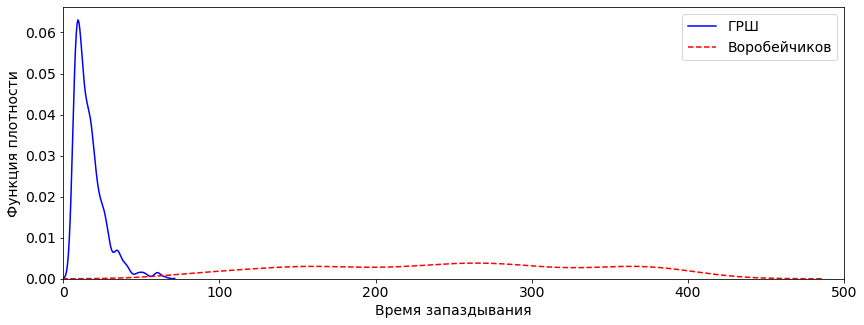

In [103]:
plt.figure(figsize=(14,5))
plt.ylabel('Функция плотности')
plt.xlabel('Время запаздывания')

plt.xlim(0, 500)

sns.kdeplot(lst_mean_1, 
            clip=(6, 70),
            kernel='gau',
            bw='silverman',
            color='blue',
            label='ГРШ');

sns.kdeplot(lst_mean_2, 
            clip=(80, 500),
            kernel='gau',
            bw='silverman',
            color='red',
            linestyle='--',
            label='Воробейчиков');

plt.legend(fontsize=14) 
plt.show()

In [ ]:
lst = []
for i in range(1000):    
    sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=1, 
        change_point_position=600, 
        mean_change=2)

    result = algorithm_grsh(seq=sequence, g=g, k=100)
    lst.append(result)

lst_mean_1 = [x-600 for x in lst if x >= 600]

lst = []
for i in range(1000):    
    sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=1, 
        change_point_position=600, 
        mean_change=2)

    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    lst.append(result)

lst_mean_2 = [x-600 for x in lst if x >= 600]

plt.figure(figsize=(14,5))
plt.ylabel('Функция плотности')
plt.xlabel('Время запаздывания')

sns.kdeplot(lst_mean_1, 
            kernel='gau',
            bw='silverman',
            color='blue',
            label='ГРШ');

sns.kdeplot(lst_mean_2, 
            kernel='gau',
            bw='silverman',
            color='red',
            linestyle='--',
            label='Воробейчиков');

plt.legend(fontsize=14) 
plt.show()

lst = []
for i in range(1000):    
    sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=2, 
                change_point_position=600, 
                mean_change=0.5)

    result = algorithm_grsh(seq=sequence, g=g, k=100)
    lst.append(result)

lst_mean_1 = [x-600 for x in lst if x >= 600]

lst = []
for i in range(1000):    
    sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=2, 
                change_point_position=600, 
                mean_change=0.5)

    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    lst.append(result)

lst_mean_2 = [x-600 for x in lst if x >= 600]

plt.figure(figsize=(14,5))
plt.ylabel('Функция плотности')
plt.xlabel('Время запаздывания')

sns.kdeplot(lst_mean_1, 
            kernel='gau',
            bw='silverman',
            color='blue',
            label='ГРШ');

sns.kdeplot(lst_mean_2, 
            kernel='gau',
            bw='silverman',
            color='red',
            linestyle='--',
            label='Воробейчиков');

plt.legend(fontsize=14) 
plt.show()

lst = []
for i in range(1000):    
    sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=1, 
                change_point_position=600, 
                standard_deviation_change=2)

    result = algorithm_grsh(seq=sequence, g=g, k=100)
    lst.append(result)

lst_mean_1 = [x-600 for x in lst if x >= 600]

lst = []
for i in range(1000):    
    sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=1, 
                change_point_position=600, 
                standard_deviation_change=2)
    
    result, _ = algorithm_change_point_St(seq=sequence, difference_step_count=10)
    lst.append(result)

lst_mean_2 = [x-600 for x in lst if x >= 600]

plt.figure(figsize=(14,5))
plt.ylabel('Функция плотности')
plt.xlabel('Время запаздывания')

sns.kdeplot(lst_mean_1, 
            kernel='gau',
            bw='silverman',
            color='blue',
            label='ГРШ');

sns.kdeplot(lst_mean_2, 
            kernel='gau',
            bw='silverman',
            color='red',
            linestyle='--',
            label='Воробейчиков');

plt.legend(fontsize=14) 
plt.show()

# Тестируем ГРШ

In [ ]:
g_list = [4,6,8,10,12,14,16,18,20]

CPM_tests = [
    (1,1,2),
    (1,1,3),
    (1,1/2,2),
    (1,2,1),
    (1,2,2),
]

NCP_tests = [
    (1,1/2),
    (1,1),
    (1,2),
]

# E = 1
CPD_tests = [
    (1,1),
    (1,1.5),
    (1,2),
    (1,3),
]

# E = 1
CPMD_tests = [
    (1/2,0.1),
    (1,0.1),
    (2,0.1),
    (1/2,0.5),
    (1,0.5),
    (2,0.5),
    (1/2,1),
    (1,1),
    (2,1),
]



In [ ]:
print('NCP тесты')
print('____________________________________________________________________________________________')
print()

for test in NCP_tests:
        
        lst = []
        for i in range(1000):    
            sequence = NoChagePoint(
                N=1000,
                mean=test[0], 
                standard_deviation=test[1])

            result = algorithm_grsh(seq=sequence, g=g, k=100)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E =', test[0], 'std =', test[1], '∆E = ', test[2])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
print('____________________________________________________________________________________________')


In [ ]:
print('CPM тесты')
print('____________________________________________________________________________________________')
print()
    for test in CPM_tests:
        
        lst = []
        for i in range(1000):    
            sequence = ChagePointMean(
                N=1000,
                mean=test[0], 
                standard_deviation=test[1], 
                change_point_position=600, 
                mean_change=test[2])

            result = algorithm_grsh(seq=sequence, g=g, k=100)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E =', test[0], 'std =', test[1], '∆E = ', test[2])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
print('____________________________________________________________________________________________')


In [ ]:
print('CPD тесты')
print('____________________________________________________________________________________________')
print()
for test in CPD_tests:
        
        lst = []
        for i in range(1000):    
            sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                standard_deviation_change=test[1])

            result = algorithm_grsh(seq=sequence, g=g, k=100)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E = 1', 'std =', test[0], '∆std = ', test[1])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
print('____________________________________________________________________________________________')



In [ ]:
print('CPMD тесты')
print('____________________________________________________________________________________________')
print()
for test in CPMD_tests:
        
        lst = []
        for i in range(1000):    
            sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                mean_change=test[1])

            result = algorithm_grsh(seq=sequence, g=g, k=100)
            lst.append(result)
        
        lst_mean = [x-600 for x in lst if x >= 600]
        lst_freq = [x for x in lst if 0 < x < 600]
        lst_no_detection = [x for x in lst if x < 0]

        average_lag_time = np.mean(lst_mean)
        false_detection_probability = len(lst_freq)/1000
        no_detection_probability = len(lst_no_detection)/1000
        std_time = np.std(lst_mean)

        print('E = 1', 'std =', test[0], 'a = ', test[1])
        print('Среднее время задержки обнаружения =', average_lag_time)
        print('Cреднеквадратичное отклонение задержки обнаружения =', std_time)
        print('Отн. частота ложного обнаружения =', false_detection_probability)
        print('Отн. частота обнаружения отсутствия разладки =', no_detection_probability)
        print()
print('____________________________________________________________________________________________')

# Анализ относительных частот попадания

In [181]:
g_list = [4,6,8,10,12,14,16,18,20]

CPM_tests = [
    (1,1,2), 
    (1,1,3),
    (1,1/2,2),
    (1,2,1),
    (1,2,2),
]

NCP_tests = [
    (1,1/2),
    (1,1),
    (1,2),
    (1,3),
]

# E = 1
CPD_tests = [
    (1,1),
    (1,1.5),
    (1,2),
    (1,3),
]

# E = 1
CPMD_tests = [
    (1/2,0.1),
    (1,0.1),
    (2,0.1),
    (1/2,0.5),
    (1,0.5),
    (2,0.5),
    (1/2,1),
    (1,1),
    (2,1),
]




k1 = 5
k2 = 10
k3 = 15
k4 = 20

def calculate_W(k, change_point_list, N=1000, CP=600):
    left = CP
    right = CP + k 
    lst_freq = [x for x in change_point_list if left <= x <= right]
    return len(lst_freq) / N

for test in CPM_tests:
        lst = []
        for i in range(1000):    
            sequence = ChagePointMean(
                N=1000,
                mean=test[0], 
                standard_deviation=test[1], 
                change_point_position=600, 
                mean_change=test[2])

            result = algorithm_grsh(seq=sequence, g=12, k=100)
            lst.append(result)
        
        W_1 = calculate_W(k1, lst)
        W_2 = calculate_W(k2, lst)
        W_3 = calculate_W(k3, lst)
        W_4 = calculate_W(k4, lst)

        print('E =', test[0], 'std =', test[1], '∆E = ', test[2])
        print('W(k1) =', W_1)
        print('W(k2) =', W_2)
        print('W(k3) =', W_3)
        print('W(k4) =', W_4)

for test in CPD_tests:
        lst = []
        for i in range(1000):    
            sequence = ChagePointDispersion(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                standard_deviation_change=test[1])

            result = algorithm_grsh(seq=sequence, g=12, k=100)
            lst.append(result)
        
        W_1 = calculate_W(k1, lst)
        W_2 = calculate_W(k2, lst)
        W_3 = calculate_W(k3, lst)
        W_4 = calculate_W(k4, lst)

        print('E = 1', 'std =', test[0], '∆std = ', test[1])
        print('W(k1) =', W_1)
        print('W(k2) =', W_2)
        print('W(k3) =', W_3)
        print('W(k4) =', W_4)

for test in CPMD_tests:
        lst = []
        for i in range(1000):    
            sequence = ChagePointMeanDynamic(
                N=1000,
                mean=1, 
                standard_deviation=test[0], 
                change_point_position=600, 
                mean_change=test[1])

            result = algorithm_grsh(seq=sequence, g=12, k=100)
            lst.append(result)
        
        W_1 = calculate_W(k1, lst)
        W_2 = calculate_W(k2, lst)
        W_3 = calculate_W(k3, lst)
        W_4 = calculate_W(k4, lst)

        print('E = 1', 'std =', test[0], 'a = ', test[1])
        print('W(k1) =', W_1)
        print('W(k2) =', W_2)
        print('W(k3) =', W_3)
        print('W(k4) =', W_4)


CPM тесты
____________________________________________________________________________________________

g = 12 ; E = 1 std = 1 ∆E =  2
W(k1) = 0.557
W(k2) = 0.812
W(k3) = 0.894
W(k4) = 0.936

g = 12 ; E = 1 std = 1 ∆E =  3
W(k1) = 0.949
W(k2) = 0.974
W(k3) = 0.974
W(k4) = 0.974

g = 12 ; E = 1 std = 0.5 ∆E =  2
W(k1) = 0.999
W(k2) = 0.999
W(k3) = 0.999
W(k4) = 0.999

g = 12 ; E = 1 std = 2 ∆E =  1
W(k1) = 0.02
W(k2) = 0.038
W(k3) = 0.054
W(k4) = 0.071

g = 12 ; E = 1 std = 2 ∆E =  2
W(k1) = 0.076
W(k2) = 0.135
W(k3) = 0.195
W(k4) = 0.238

____________________________________________________________________________________________
CPD тесты
____________________________________________________________________________________________

g = 12 ; E = 1 std = 1 ∆std =  1
W(k1) = 0.139
W(k2) = 0.243
W(k3) = 0.317
W(k4) = 0.394

g = 12 ; E = 1 std = 1 ∆std =  1.5
W(k1) = 0.31
W(k2) = 0.475
W(k3) = 0.621
W(k4) = 0.702

g = 12 ; E = 1 std = 1 ∆std =  2
W(k1) = 0.429
W(k2) = 0.645
W(k3) = 0.769
W(

# Время задержки обнаружения

In [36]:
lst = []
for i in range(1000):    
    sequence = ChagePointMean(
    N=1000,
    mean=1, 
    standard_deviation=1, 
    change_point_position=600, 
    mean_change=3)

    result = algorithm_grsh(seq=sequence, g=10, k=100)
    lst.append(result)
        
lst_mean = [x-600 for x in lst if x >= 600]
lst_freq = [x for x in lst if x < 600]

average_lag_time = np.mean(lst_mean)
false_detection_probability = len(lst_freq)/1000

print('Среднее время задержки обнаружения =', average_lag_time,
      'Вероятность ложного обнаружения =', false_detection_probability)


Среднее время задержки обнаружения = 1.4989539748953975 Вероятность ложного обнаружения = 0.044


In [42]:
g_list = [4,6,8,10,12,14,16,18,20]

for g in g_list:
    lst = []
    for i in range(100):    
        sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=1, 
        change_point_position=600, 
        mean_change=3)

        result = algorithm_grsh(seq=sequence, g=6, k=100)
        lst.append(result)

    lst_mean = [x-600 for x in lst if x >= 600]
    lst_freq = [x for x in lst if x < 600]

    average_lag_time = np.mean(lst_mean)
    false_detection_probability = len(lst_freq)/1000

    print('Среднее время задержки обнаружения =', average_lag_time,
          'Вероятность ложного обнаружения =', false_detection_probability,
         'g=', g)


Среднее время задержки обнаружения = 3.4416826003824093 Вероятность ложного обнаружения = 0.477 g= 4
Среднее время задержки обнаружения = 4.224264705882353 Вероятность ложного обнаружения = 0.184 g= 6
Среднее время задержки обнаружения = 4.57360959651036 Вероятность ложного обнаружения = 0.083 g= 8
Среднее время задержки обнаружения = 5.105374077976817 Вероятность ложного обнаружения = 0.051 g= 10
Среднее время задержки обнаружения = 4.9569230769230765 Вероятность ложного обнаружения = 0.025 g= 12
Среднее время задержки обнаружения = 5.998978549540348 Вероятность ложного обнаружения = 0.021 g= 14
Среднее время задержки обнаружения = 6.157416750756811 Вероятность ложного обнаружения = 0.009 g= 16
Среднее время задержки обнаружения = 6.379518072289157 Вероятность ложного обнаружения = 0.004 g= 18
Среднее время задержки обнаружения = 6.653961885656971 Вероятность ложного обнаружения = 0.003 g= 20


In [47]:
lst = []
for i in range(1000):    
    sequence = NoChangePoint(
    N=1000,
    mean=1, 
    standard_deviation=1/2)

    result = algorithm_grsh(seq=sequence, g=12, k=100)
    lst.append(result)
        
lst_mean = [x-600 for x in lst if x >= 600]
lst_freq = [x for x in lst if x < 600]

average_lag_time = np.mean(lst_mean)
false_detection_probability = len(lst_freq)/1000

print('Среднее время задержки обнаружения =', average_lag_time,
      'Вероятность ложного обнаружения =', false_detection_probability)


Среднее время задержки обнаружения = nan Вероятность ложного обнаружения = 1.0


C:\Users\TryUserPWNZ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\TryUserPWNZ\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [232]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

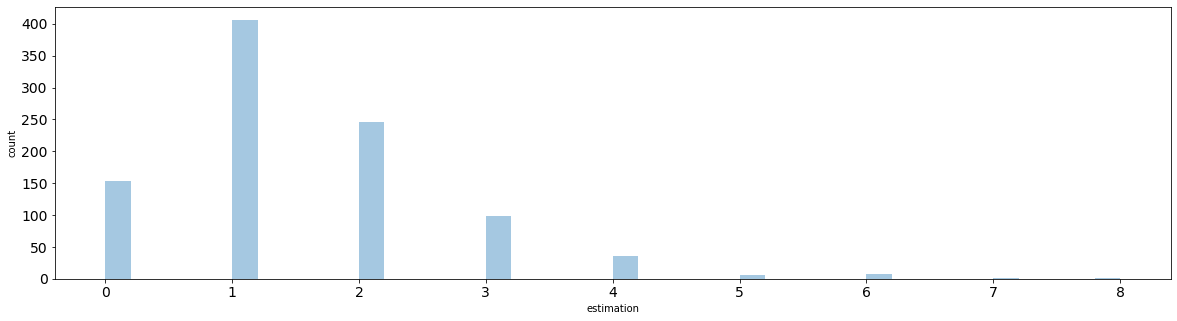

In [38]:
plt.figure(figsize=(20,5))
plt.ylabel('count')
plt.xlabel('estimation')

sns.distplot(lst_mean, kde=False)

In [9]:
sns.distplot(lst_mean, kde=False)

ValueError: Buffer dtype mismatch, expected 'DOUBLE' but got 'long'

# Рабочий вариант ГРШ:

In [168]:
def algorithm_grsh(seq, g, k):
    R = [0]
    
    # Заполняем изначальными значениями
    while len(sequence.sequence) < k:
        new_value = next(sequence)

    from numpy import mean, std
    m = mean(sequence.sequence)
    s = np.std(sequence.sequence)
    v = (abs(m) + 2*s) 
    
    for new_value in seq:
        Rt = exp(new_value - v) * (1 + R[-1])
        if Rt > g:
            #print('changepoint', seq.counter - 1, 'Rt =', Rt)
            return seq.counter - 1
        R.append(Rt)
    #print('No change points.')
    return -1

In [164]:
f = open('text.txt', 'w')

for i in range(10):    
    
    sequence = ChagePointDispersion(
        N=1000,
        mean=4, 
        standard_deviation=1, 
        change_point_position=600, 
        standard_deviation_change=3)
    
    f.write(str(algorithm_grsh(seq=sequence, g=9, k=100)) + '\n')
    
f.close()

In [171]:
f = open('text.txt', 'w')
lst = []

for i in range(10):    
    
    sequence = ChagePointMean(
        N=1000,
        mean=1, 
        standard_deviation=3, 
        change_point_position=600, 
        mean_change=8)
    
    result = algorithm_grsh(seq=sequence, g=12, k=100)
    print(result)
    
f.close()

338
477
384
342
267
171
177
577
401
232


In [119]:
for i in range(10):    
    
    sequence = ChagePointMeanDynamic(
        N=1000,
        mean=-2, 
        standard_deviation=1, 
        change_point_position=600, 
        mean_change=0.3)
    
    algorithm_grsh(seq=sequence, g=9, k=100)

changepoint 620 Rt = 29.534914363339
changepoint 620 Rt = 13.764189836806798
changepoint 622 Rt = 9.447199710937829
changepoint 619 Rt = 20.713010735829343
changepoint 622 Rt = 14.13519441820086
changepoint 622 Rt = 10.0266601234632
changepoint 618 Rt = 23.24361339947812
changepoint 620 Rt = 15.471927510327417
changepoint 622 Rt = 15.447419709775064
changepoint 621 Rt = 9.151608467290046


Wотс = 0.952


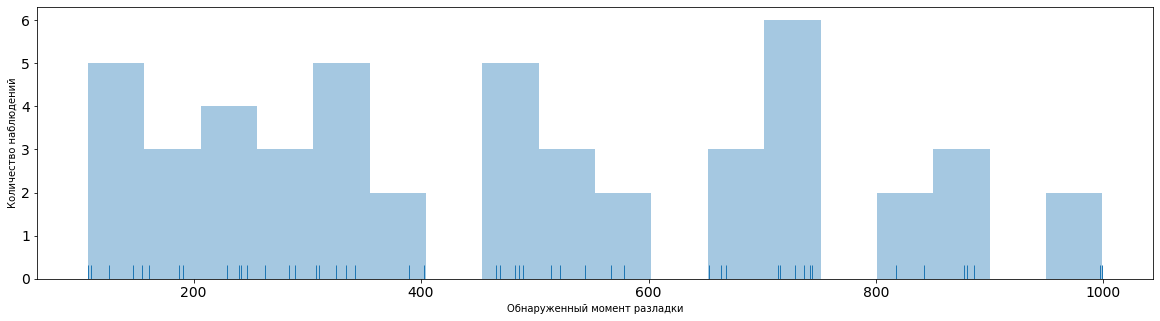

In [176]:
tests = [1, 1.5, 2, 2.5, 3]

for test in tests:
    cp_lst = []
    for i in range(1000):    

        sequence = NoChangePoint(
            N=1000,
            mean=1, 
            standard_deviation=test)

        result = algorithm_grsh(seq=sequence, g=12, k=100)
        cp_lst.append(result)

    cp = [x for x in cp_lst if x > 0]
    print('Wотс =', (1000-len(cp))/1000)
    plt.figure(figsize=(20,5))
    plt.ylabel('Количество наблюдений')
    plt.xlabel('Обнаруженный момент разладки')
    sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.743


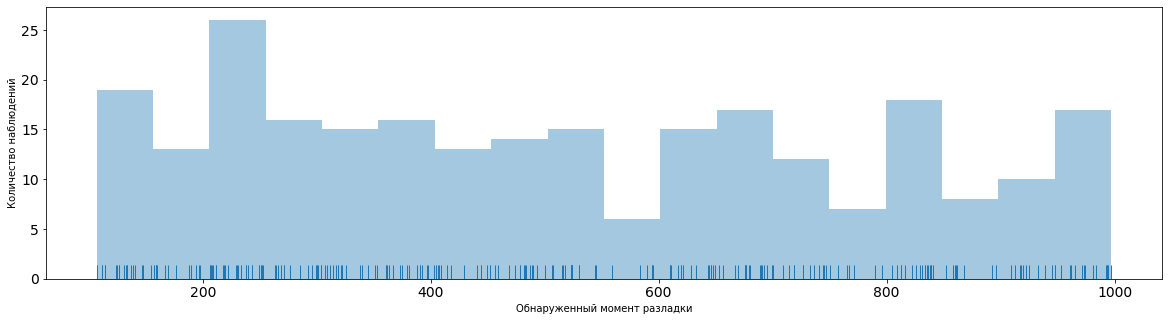

In [177]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=1.5)
    
    result = algorithm_grsh(seq=sequence, g=12, k=100)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.475


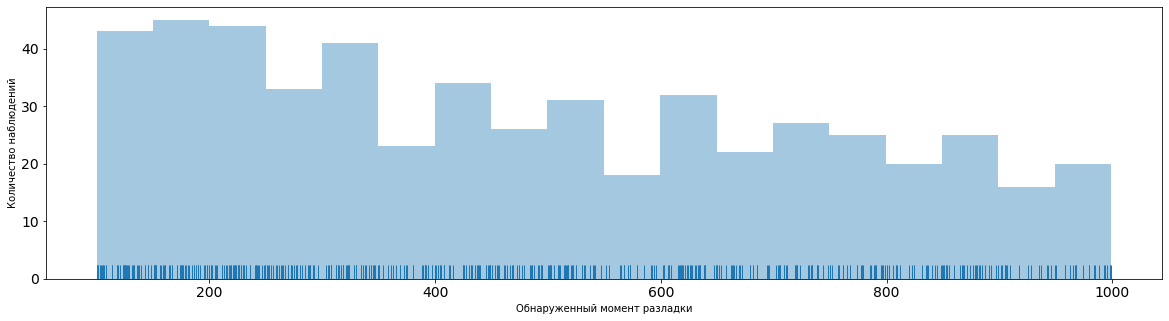

In [178]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=2)
    
    result = algorithm_grsh(seq=sequence, g=12, k=100)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.241


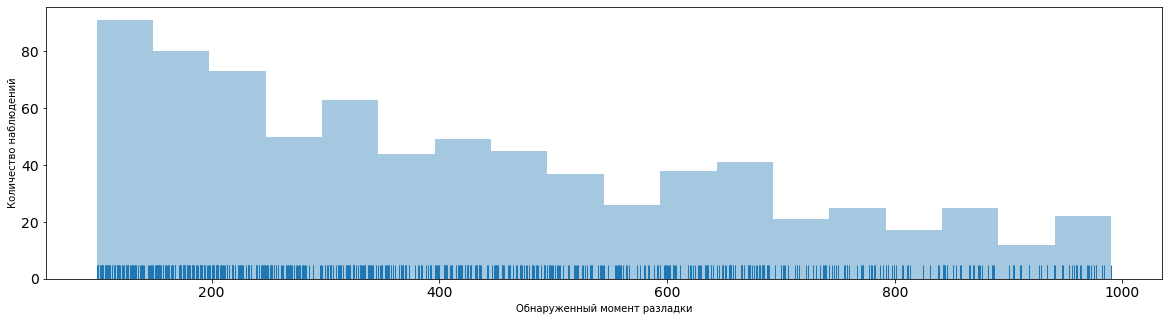

In [179]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=2.5)
    
    result = algorithm_grsh(seq=sequence, g=12, k=100)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

Wотс = 0.127


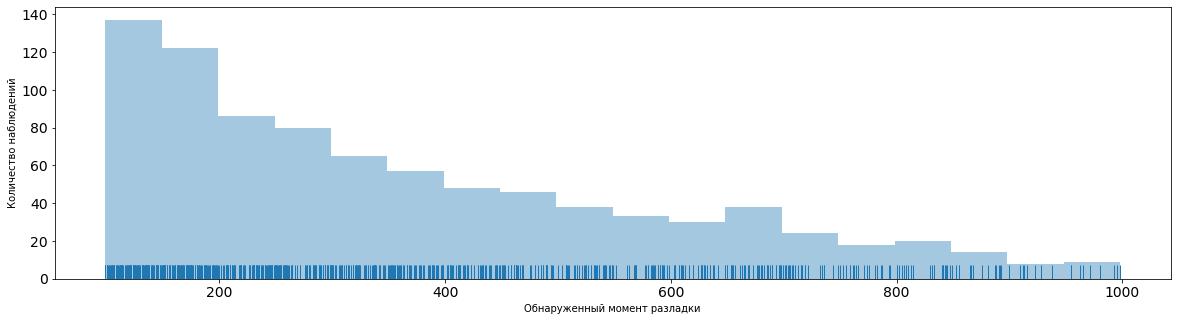

In [180]:
cp_lst = []
for i in range(1000):    
    
    sequence = NoChangePoint(
        N=1000,
        mean=1, 
        standard_deviation=3)
    
    result = algorithm_grsh(seq=sequence, g=12, k=100)
    cp_lst.append(result)

cp = [x for x in cp_lst if x > 0]
print('Wотс =', (1000-len(cp))/1000)
plt.figure(figsize=(20,5))
plt.ylabel('Количество наблюдений')
plt.xlabel('Обнаруженный момент разладки')
sns.distplot(cp, kde=False, rug=True, bins=18)

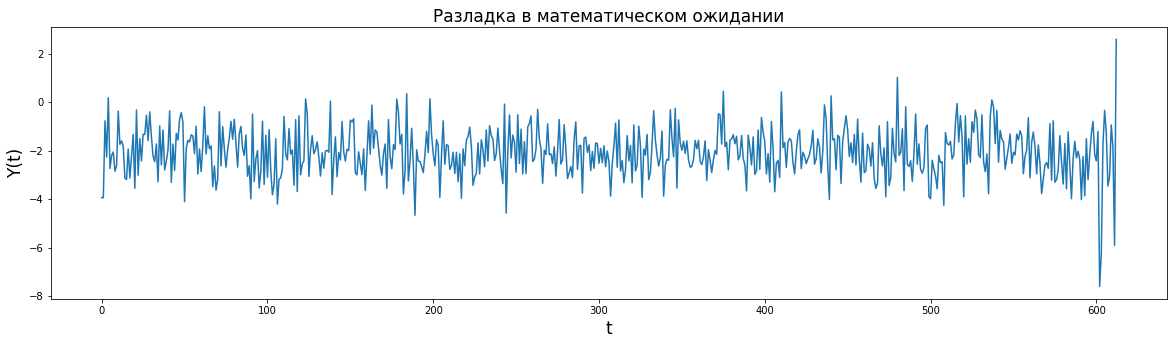

In [30]:
plt.figure(figsize=(20,5))
plt.ylabel('Y(t)', fontsize=17)
plt.xlabel('t', fontsize=17)
plt.title('Разладка в математическом ожидании', fontsize=17)
plt.plot(sequence.sequence)
plt.show()

# Алгоритм ГРШ с настройкой

In [ ]:
def algorithm_grsh(seq, v):
    G = [0]

    for new_value in seq:
        Gt = exp(new_value - v) * (1 + G[-1])
        if Gt > 10:
            print('changepoint', seq.counter, 'Gt =', Gt)
            break
        G.append(Gt)


for i in range(30):    
    sequence = ChagePointMean(N=1000, mean=-3, standard_deviation=1, change_point_position=600, mean_change=4)
    algorithm_grsh(seq=sequence, v=0)